In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../data/tweets_final.csv')

## Data Understanding

In [3]:
df.shape

(172, 11)

In [4]:
df.head()

,profile_id,name,username,topic,text,date,time,likes,comments,reposts,theme
0,1602150243629662209,Dr. Adrian Wong,@AdrianTechARP,health,Can foreign DNA in mRNA vaccines change our DN...,2024-01-17,23:58,0,0,0,mRNA vaccines DNA
1,1657442057244364801,Investor,@MgmtAnalyst,health,How long will you live? https://www.businessi...,2024-01-17,23:58,0,0,0,NaN
2,1509924409137532936,Stevita Naturals,@StevitaNaturals,health,Beverages are the easiest place to use stevia....,2024-01-17,23:56,1,0,0,Stevia beverages
3,1278265764127158275,EngineeredLifestyles,@EngLifestyles,health,What toxins are you subjecting yourself to on ...,2024-01-17,23:55,0,0,0,Toxins exposure
4,1608083780824088577,8News WRIC Richmond,@8NEWS,health,Take these steps to protect yourself from wint...,2024-01-17,23:53,1,0,0,Winter health protection


In [5]:
df.describe()

,likes,comments,reposts
count,172.000000,172.000000,172.000000
mean,1.616279,0.261628,0.220930
std,7.118329,0.598374,1.133242
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,87.000000,3.000000,11.000000


In [6]:
df.describe(include='object')

,profile_id,name,username,topic,text,date,time,theme
count,172,172,172,172,172,172,172,128
unique,143,144,144,3,165,1,80,119
top,1742200480304947200,martin zane,@feartheterp85,space,Loving #CharacterX# Chat and voice talk with u...,2024-01-17,23:53,Fitness training
freq,7,7,7,64,6,172,10,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   profile_id  172 non-null    object
 1   name        172 non-null    object
 2   username    172 non-null    object
 3   topic       172 non-null    object
 4   text        172 non-null    object
 5   date        172 non-null    object
 6   time        172 non-null    object
 7   likes       172 non-null    int64 
 8   comments    172 non-null    int64 
 9   reposts     172 non-null    int64 
 10  theme       128 non-null    object
dtypes: int64(3), object(8)
memory usage: 14.9+ KB


## Feature Understanding

#### Univaraiate Analysis

1. Number of tweets in each topic

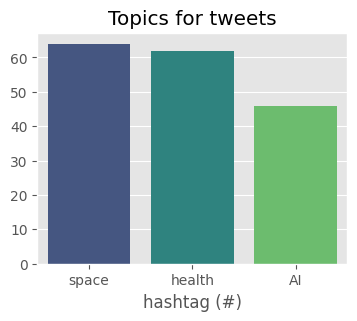

In [8]:
# rows for each topic
topics = df['topic'].value_counts()

plt.figure(figsize=(4, 3))
sns.barplot(x=topics.index, y=topics.values, hue=topics.index, palette='viridis')
plt.title("Topics for tweets")
plt.xlabel("hashtag (#)")
plt.show()

2. Users (usernames) with most tweets

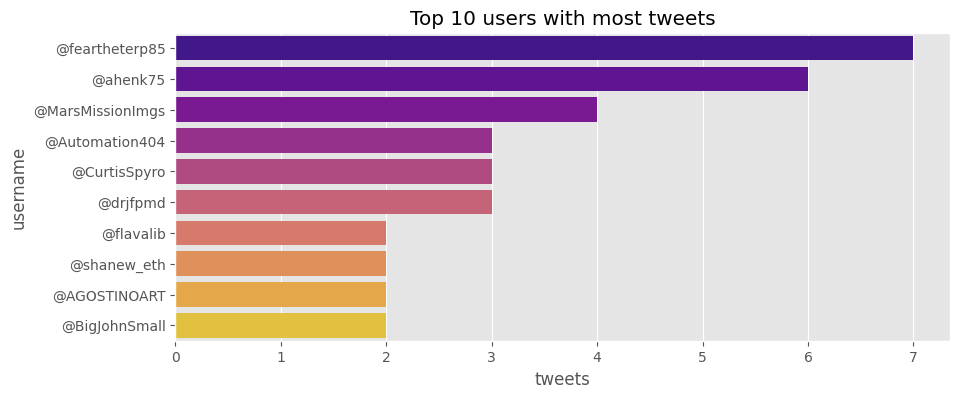

In [9]:
users = df['username'].value_counts()

top_ten_users = users[:10]
# top ten users with most tweets
plt.figure(figsize=(10, 4))
sns.barplot(x=top_ten_users.values, y=top_ten_users.index, hue=top_ten_users.index, palette='plasma')
plt.title("Top 10 users with most tweets")
plt.xlabel("tweets")
plt.show()

3. Data and Time

In [10]:
df['date'].value_counts()

date
2024-01-17    172
Name: count, dtype: int64

In [11]:
from matplotlib.dates import DateFormatter

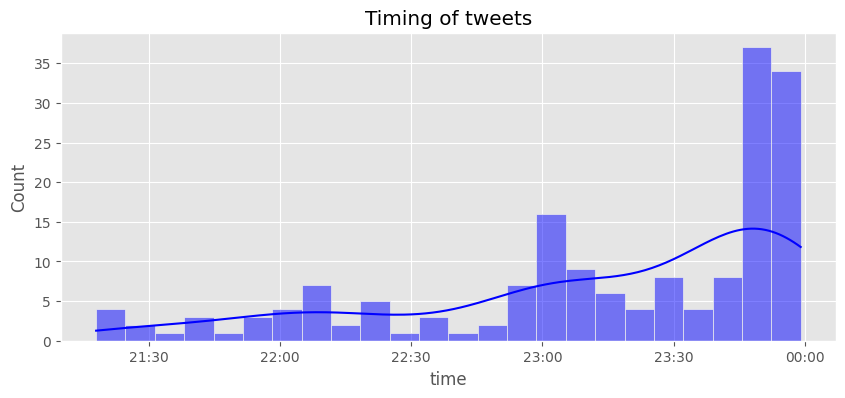

In [12]:
# time of tweets

df['time'] = pd.to_datetime(df['time'], format='%H:%M')

plt.figure(figsize=(10, 4))
ax = sns.histplot(data=df, x='time', color='blue', bins=24, kde=True)
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.title("Timing of tweets")
plt.show()

4. Likes, Comments, and Reposts

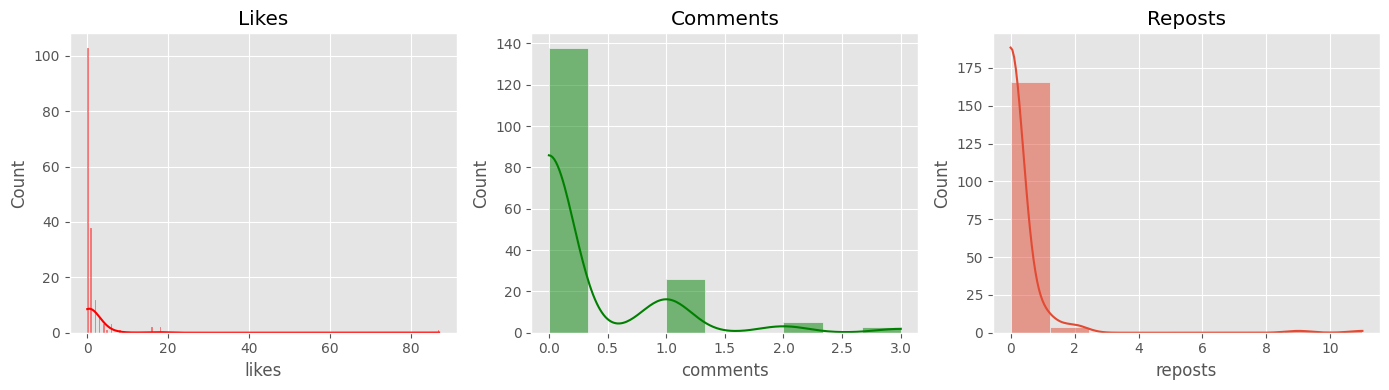

In [13]:
# Create three subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Plot on the first subplot using seaborn
sns.histplot(data=df, x='likes', kde=True, ax=axes[0], color='red')
axes[0].set_title('Likes')

# Plot on the first subplot using seaborn
sns.histplot(data=df, x='comments', kde=True, ax=axes[1], color='green')
axes[1].set_title('Comments')

# Plot on the first subplot using seaborn
sns.histplot(data=df, x='reposts', kde=True, ax=axes[2])
axes[2].set_title('Reposts')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

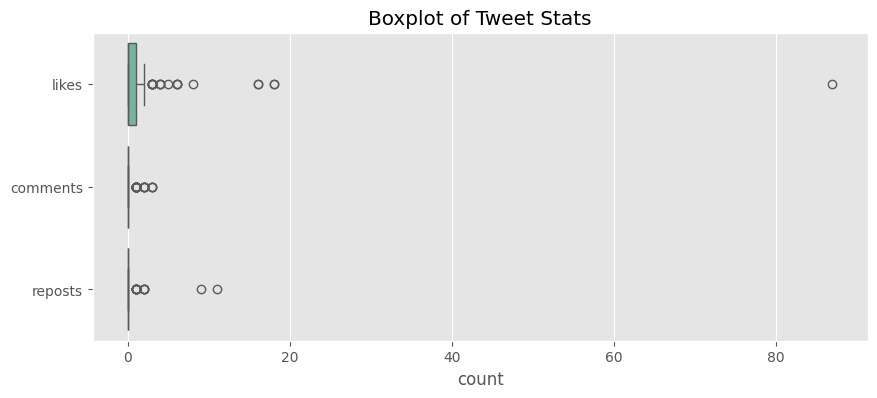

In [14]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['likes', 'comments', 'reposts']], palette='Set2', orient='h')

plt.xlabel('count')
plt.title('Boxplot of Tweet Stats')
plt.show()

## Feature Relationships

#### Bivariate Analysis

1. Topic vs Likes 

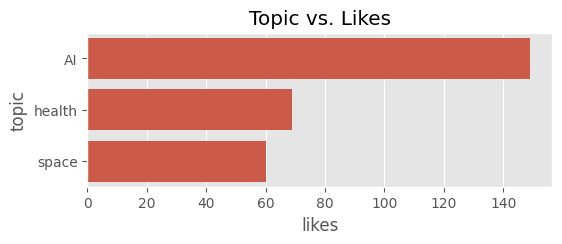

In [15]:
topic_likes = df.groupby('topic')['likes'].sum().reset_index()

plt.figure(figsize=(6, 2))
sns.barplot(y=topic_likes['topic'], x=topic_likes['likes'])
plt.title("Topic vs. Likes")
plt.show()

2. Date/Time vs Likes

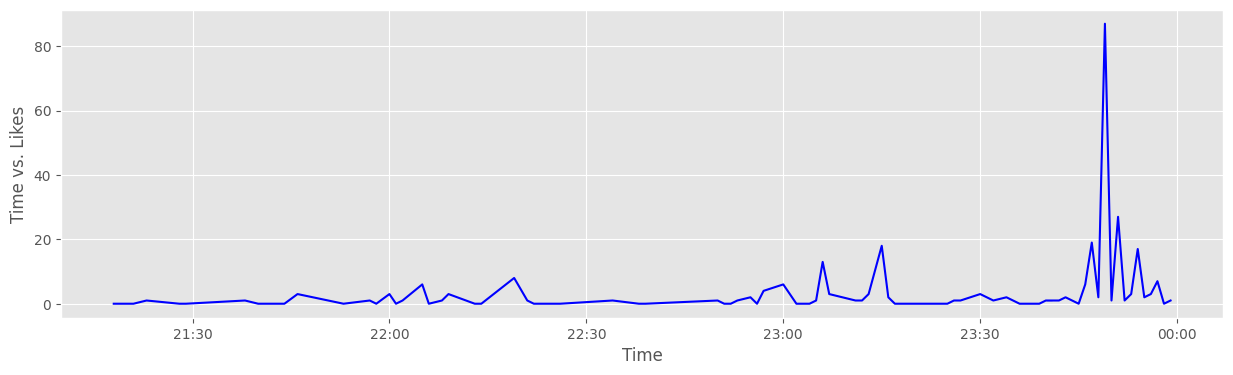

In [16]:
time_likes = df.groupby(df['time'].dt.time)['likes'].transform('sum')
plt.figure(figsize=(15, 4))
ax = sns.lineplot(data=df, x='time', y=time_likes, color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('Time vs. Likes')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.show()


3. Users with most Likes

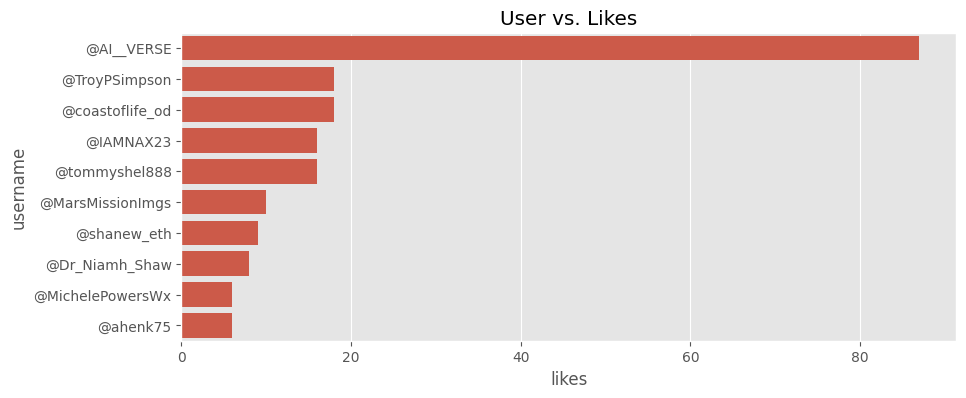

In [17]:
# top 10 users with most likes
top_users_likes = df.groupby('username')['likes'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(y=top_users_likes['username'], x=top_users_likes['likes'])
plt.title("User vs. Likes")
plt.show()

4. Tweets with the most Likes

In [18]:
# top 5 most liked tweets
most_liked_tweets = df.sort_values(by='likes', ascending=False)
most_liked_tweets.iloc[:5,:]

,profile_id,name,username,topic,text,date,time,likes,comments,reposts,theme
95,1636997872360230912,AI Verse,@AI__VERSE,AI,AI Uehara Channel @aiuehara_ai No need for s...,2024-01-17,1900-01-01 23:49:00,87,2,9,AI assistant
7,1714153101303988225,Troy’s Voice,@TroyPSimpson,health,"Covid, Day 5. Today’s update is full of suspen...",2024-01-17,1900-01-01 23:51:00,18,3,1,Covid health update
38,1726571932080873472,Coast of Life,@coastoflife_od,health,Some brave #fellas received sanitisers to stay...,2024-01-17,1900-01-01 23:15:00,18,0,2,sanitisers stay safe
102,1733136625897488384,Tommy Shelby,@tommyshel888,AI,Together with ORACLE’s powerful #AI-accelerate...,2024-01-17,1900-01-01 23:47:00,16,2,11,AI-accelerated Software
78,1651404030940442625,IAMNAX,@IAMNAX23,AI,Ai blend is crazy. I took these two #ai gener...,2024-01-17,1900-01-01 23:54:00,16,3,0,AI Image Blending
